# **California Housing Price**

# **Business Problem Understanding**

**Context**

Dataset ini berupa Harga Rumah Sensus California pada tahun 1990 berisi informasi perumahan dan demografi komprehensif, termasuk nilai median rumah, tingkat sewa, persentase kepemilikan, dan karakteristik demografis, memberikan wawasan tentang pasar perumahan dan lanskap sosial-ekonomi negara bagian tersebut pada periode tersebut. Namun,tidak semua data yang tersebut diatas masuk kedalam dataset ini.

Dataset Harga Rumah Sensus California 1990 memberikan perspektif historis yang berharga tentang dinamika perumahan dan berfungsi sebagai dasar untuk memahami interaksi kompleks antara demografi, ekonomi, dan properti dalam negara bagian tersebut pada era tersebut.

Kita bisa menggunakan dataset ini untuk memprediksi nilai properti secara akurat. Maka, pelanggan lebih cenderung mempercayai perusahaan dan proses bisnisnya. Oleh karena itu, memprediksi harga dapat menarik pelanggan baru dan mengoptimalkan penjualan.

**Problem Statement**

Perusahaan real estate termasuk kompleks dan dipengaruhi oleh banyak faktor seperti lokasi, ukuran properti, fasilitas, tren pasar, indikator ekonomi, dan banyak lagi. Penilaian properti yang akurat sangat penting untuk membuat keputusan berdasarkan informasi, menetapkan harga yang kompetitif, menegosiasikan kesepakatan, dan memberikan layanan yang andal kepada klien. Saat ini, proses penilaian properti perusahaan sangat bergantung pada analisis manual dan penilaian ahli, yang dapat memakan waktu dan rentan terhadap ketidakkonsistenan.

**Goal**

Perusahaan Real Estate ingin mengembangkan solusi machine learning yang dapat memprediksi nilai properti secara akurat berdasarkan data properti historis dan indikator pasar yang relevan. Tujuannya adalah untuk merampingkan proses penilaian mereka, meningkatkan akurasi, dan memberi klien laporan penilaian yang transparan dan berbasis data.

**Analytic Aproach**

Jadi, yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan satu properti dengan yang lainnya.

Selanjutnya, kita akan membangun suatu model regresi (machine learning) yang akan membantu perusahaan untuk dapat memprediksi harga yang akan berguna untuk keterbaikan customer maupun perusahaan sendiri.

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan.

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

# **Data Understanding** #





*   Dataset merupakan data sensus perumahan california pada tahun 1990






In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/data_california_house.csv'
df = pd.read_csv(path)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


Dalam dataset ini, saya akan menjelaskan features yang ada.

1. longitude : Koordinat untuk timur ke barat, lebih tinggi berarti lebih ke barat
2. latitude  : Koordinat untuk Selatan ke Utara, lebih tinggi berarti lebih ke Utara
3. housing_median_age : Median umur rumah dalam suatu blok, lebih rendah berarti bangunannya lebih baru.
4. total_rooms : Jumlah total kamar dalam satu blok.
5. total_bedrooms : Jumlah total kamar tidur dalam satu blok.
6. population : Total populasi dalam satu blok.
7. households : Jumlah total rumah tangga (Sekelompok orang yang berada didalam satu rumah) dalam satu blok.
8. median_income : Median Pemasukan Rumah Tangga dalam satu blok
9. ocean_proximity : Lokasi Rumah (Lebih dekat ke lautan apa tidak)
10. median_house_value : Median harga rumah untuk perumahan dalam satu blok.


## Exploratory Data Analaysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

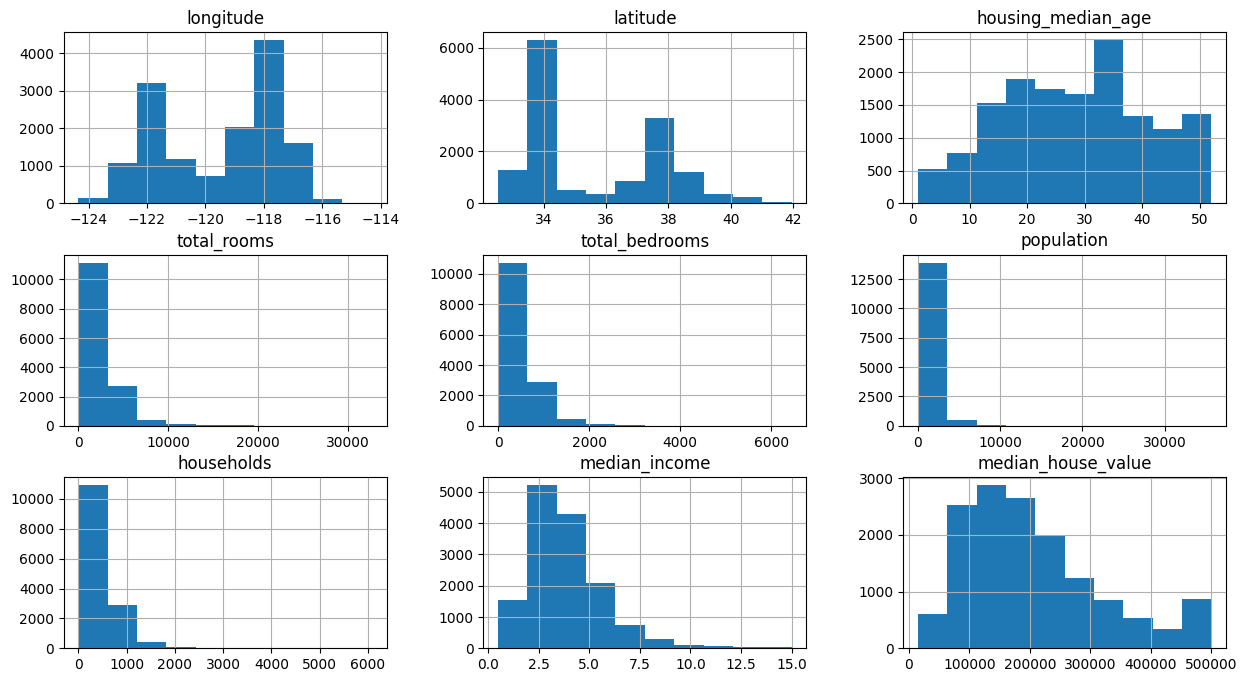

In [5]:
df.hist(figsize = (15,8))

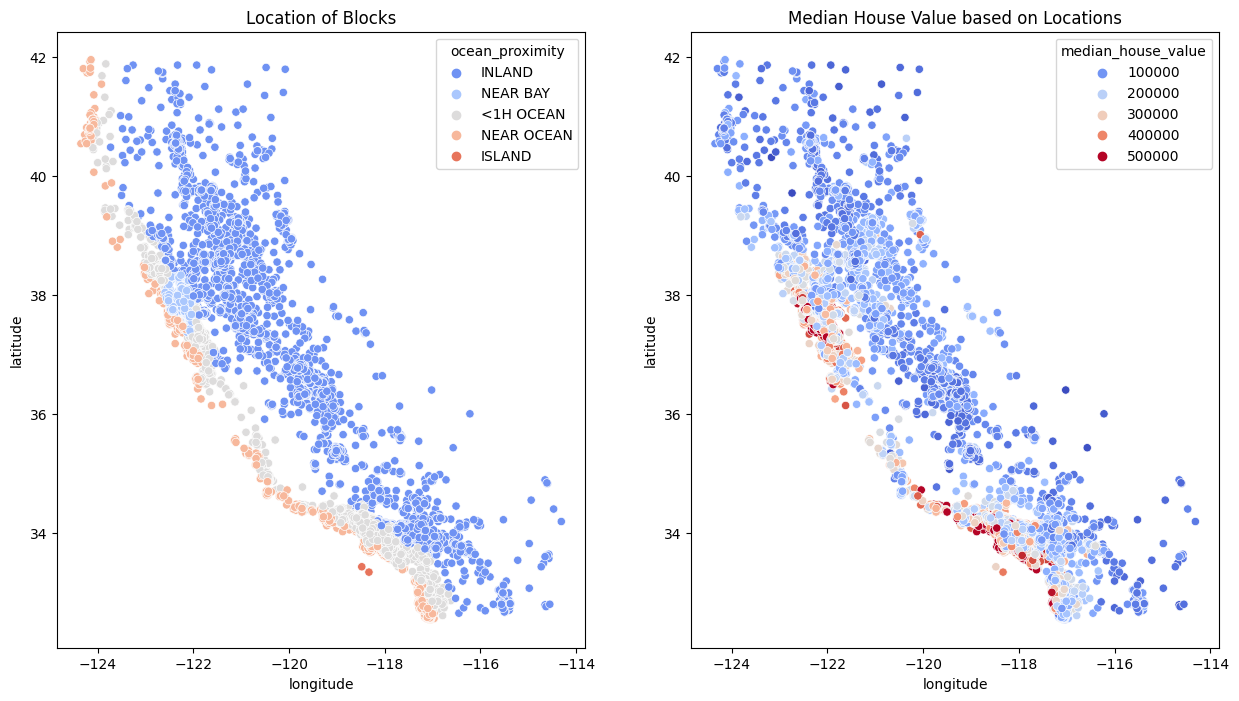

In [6]:
plt.figure(figsize = (15,8))

ax = plt.subplot(1,2,1)
sns.scatterplot(x ='longitude', y ='latitude', data=df,hue="ocean_proximity", palette="coolwarm")
plt.title('Location of Blocks')
ax = plt.subplot(1,2,2)
sns.scatterplot(x ='longitude', y ='latitude', data=df,hue="median_house_value", palette="coolwarm")
plt.title('Median House Value based on Locations')

plt.show()

Bisa terlihat disini, tempat yang lebih mendekati ke lautan memiliki harga yang lebih mahal.

# Data Preprocessing

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:
- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


Dari info diatas, hanya total_bedrooms yang memiliki null data. Maka akan kita drop.

In [8]:
df.dropna(inplace = True)
#Karena null value hanya sedikit di total_bedrooms, kita drop saja.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14311 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14311 non-null  float64
 1   latitude            14311 non-null  float64
 2   housing_median_age  14311 non-null  float64
 3   total_rooms         14311 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14311 non-null  float64
 6   households          14311 non-null  float64
 7   median_income       14311 non-null  float64
 8   ocean_proximity     14311 non-null  object 
 9   median_house_value  14311 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.2+ MB


In [10]:
# Membuat duplikasi dataframe
df_model = df.copy()

In [11]:
column = df_model.columns

unique_values = [df_model[col].unique() for col in column]
nunique_values = [df_model[col].nunique() for col in column]
missing_value = [df_model[col].isnull().sum() for col in column]

pd.DataFrame({
    'column name': column,
    'missing_value': missing_value,
    'nunique': nunique_values,
    'unique': unique_values
})

,column name,missing_value,nunique,unique
0,longitude,0,806,"[-119.79, -122.21, -118.04, -118.28, -119.81, ..."
1,latitude,0,835,"[36.73, 37.77, 33.87, 34.06, 33.8, 33.81, 38.6..."
2,housing_median_age,0,52,"[52.0, 43.0, 17.0, 50.0, 11.0, 14.0, 6.0, 10.0..."
3,total_rooms,0,5213,"[112.0, 1017.0, 2358.0, 2518.0, 772.0, 10535.0..."
4,total_bedrooms,0,1748,"[28.0, 328.0, 396.0, 1196.0, 194.0, 1620.0, 14..."
5,population,0,3491,"[193.0, 836.0, 1387.0, 3051.0, 606.0, 4409.0, ..."
6,households,0,1646,"[40.0, 277.0, 364.0, 1000.0, 167.0, 1622.0, 14..."
7,median_income,0,9726,"[1.975, 2.2604, 6.299, 1.7199, 2.2206, 6.67, 8..."
8,ocean_proximity,0,5,"[INLAND, NEAR BAY, <1H OCEAN, NEAR OCEAN, ISLAND]"
9,median_house_value,0,3540,"[47500.0, 100000.0, 285800.0, 175000.0, 59200...."


In [12]:
df_model.duplicated().sum()

0

<Axes: >

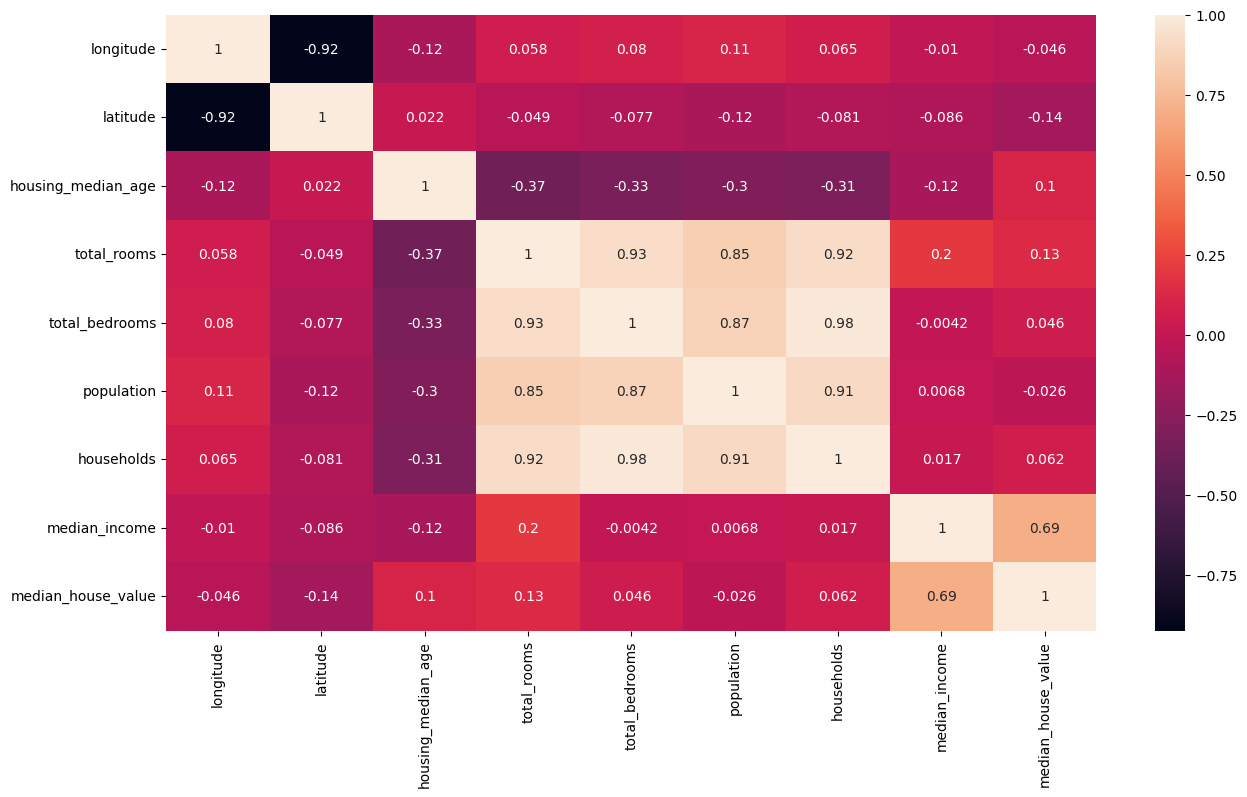

In [13]:
plt.figure(figsize = (15,8))
sns.heatmap(df_model.corr(), annot= True)

Correlation Matrix menunjukan bahwa median_income yang mempunyai korelasi tertinggi terhadap median_house_value.

Correlation matrix juga menunjukkan bahwa tidak ada fitur yang memiliki korelasi yang kuat terhadap fitur median_house_value. Korelasi paling tinggi dimiliki oleh fitur 'latitude', di mana korelasinya adalah korelasi negatif. Ini berarti semakin ke utara lokasi suatu blok, maka harganya pun semakin murah.

In [14]:
df_model = df_model.join(pd.get_dummies(df_model.ocean_proximity)).drop(['ocean_proximity'], axis = 1)
#Kita akan mengubah categorical features ocean proximity menjadi binary, biar bisa kita ketahui kolerasinya terhadap median house value lebih baik lagi


<Axes: >

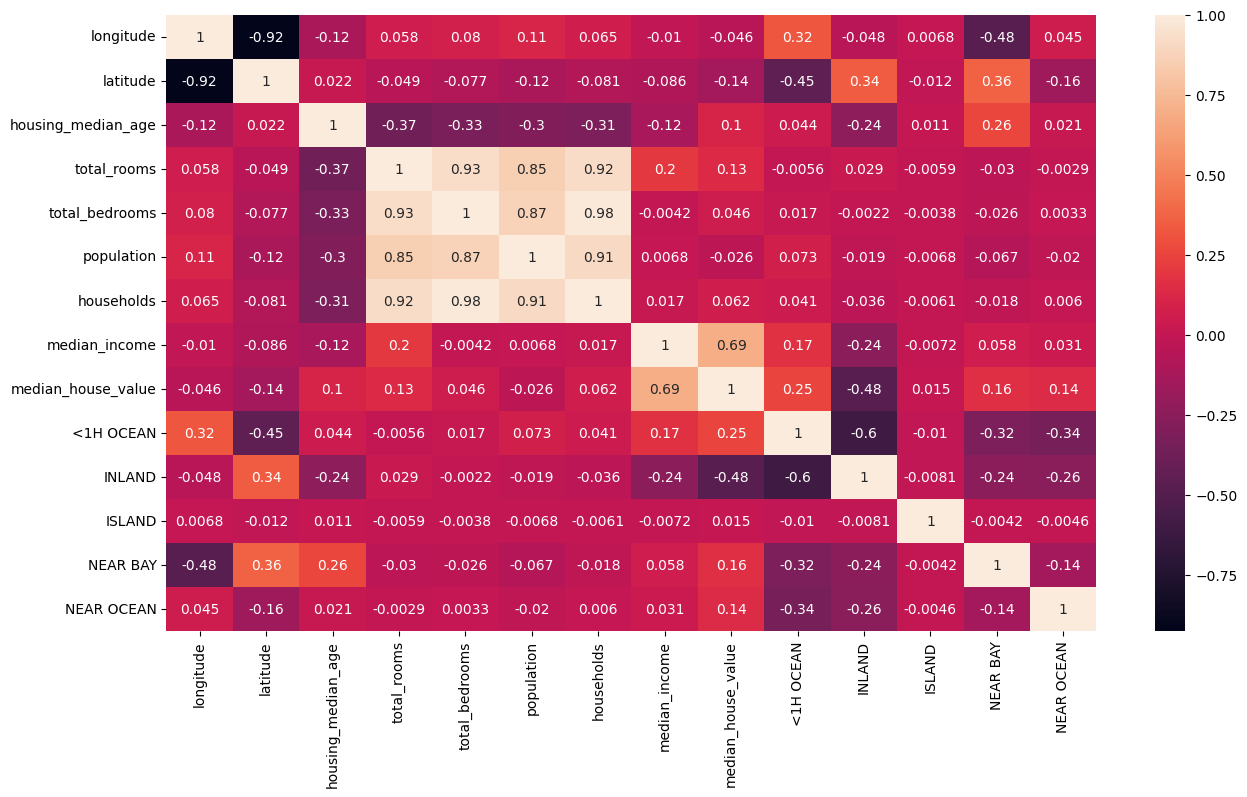

In [15]:
plt.figure(figsize = (15,8))
sns.heatmap(df_model.corr(), annot= True)

Dari correlation matrix tersebut kita bisa melihat bahwa untuk rumah yang ada kurang dari satu jam ke laut, memiliki harga yang lebih mahal daripada untuk perumahan yang ada di tengah kota.

Dugaan kita terhadap lokasi terhadap harga terbukti benar.

#Modeling

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold



from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [17]:
X = df_model.drop(['median_house_value'], axis=1)
y = df_model['median_house_value']

In [18]:
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=1)

In [19]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:

    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([

        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_root_mean_squared_error',
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_error',
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_percentage_error',
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-95859.86845484 -85130.04525722 -85614.41711419 -97045.55490342
 -79775.95594249] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-53209.31705004 -52980.47646637 -50500.32115498 -55239.74667546
 -50585.41812087] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.26094947 -0.27014918 -0.26439922 -0.26716841 -0.26047168] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-59590.77393809 -65346.70753571 -63352.96619636 -67013.80106343
 -63512.46014425] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-40903.08580484 -42873.86461062 -41286.13487653 -43879.03516307
 -41801.13456554] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,


In [20]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-88685.168334,6675.550374,-52503.055894,1783.507371,-0.264628,0.003682
1,KNN Regressor,-63763.341776,2478.475531,-42148.651004,1089.614475,-0.218151,0.005403
2,DecisionTree Regressor,-71183.923429,2767.975772,-46084.319993,1458.539361,-0.251081,0.011911
3,RandomForest Regressor,-52553.220582,2010.164689,-33984.695622,901.249882,-0.178524,0.004519
4,XGBoost Regressor,-50882.796537,2189.505300,-33257.164643,823.462923,-0.173874,0.003835


Terdapat perbedaan cukup signifikan antara nilai RMSE dan MAE, di mana nilai RMSE lebih tinggi karena nilai residuals atau error-nya dikuadratkan terlebih dahulu sebelum dirata-ratakan. Hal ini menyebabkan RMSE akan memberikan 'weight' yang lebih tinggi untuk nilai error yang besar. Dengan kata lain, terdapat nilai-nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan signifikan antara nilai RMSE dan MAE.

- Berdasarkan nilai RMSE, MAE dan MAPE, XGBoost adalah model terbaik.
- Nilai RMSE, MAE, dan MAPE terbaik ke dua ada pada RandomForest
- Selanjutnya, akan dilakukan prediksi pada test set dengan 2 benchmark model terbaik, yaitu XGBoost dan RandomForest.

In [21]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([

        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,48373.847446,32214.331487,0.179132
RandomForest,49983.224764,32629.273982,0.181118


- Ketika dilakukan prediksi pada test set, tetap performa XGBoost semuanya lebih baik. Hal ini dapat dilihat dari nilai RMSE, MAE, dan MAPE yang lebih rendah dari RandomForest.


**Hyperparameter Tuning**

Karena model XGBoost memiliki performa yang lebih baik dari RandomForest, maka selanjutnya kita akan menggunakan model XGBoost ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

In [22]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth,
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [23]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([

        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb,
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval,
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1
)

In [24]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           early_stopping_rounds=None,
                                                           enable_categorical=False,
                                                           eval_metric=None,
                                                           feature_types=None,
                                                           gamma=N...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [25]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -48381.01763415323
Best_params: {'model__subsample': 0.9, 'model__reg_alpha': 0.05994842503189409, 'model__n_estimators': 119, 'model__max_depth': 8, 'model__learning_rate': 0.05, 'model__gamma': 5, 'model__colsample_bytree': 0.8}


In [26]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,46859.156553,30771.753612,0.169946


In [27]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,48373.847446,32214.331487,0.179132


Model mengalami peningkatan performa (nilai RMSE, MAE & MAPE berkurang) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit.
- RMSE, MAE & MAPE sebelum tuning: 48373.84, 32214.33, 0.179
- RMSE, MAE & MAPE setelah tuning: 46859.15, 30771.75, 0.169

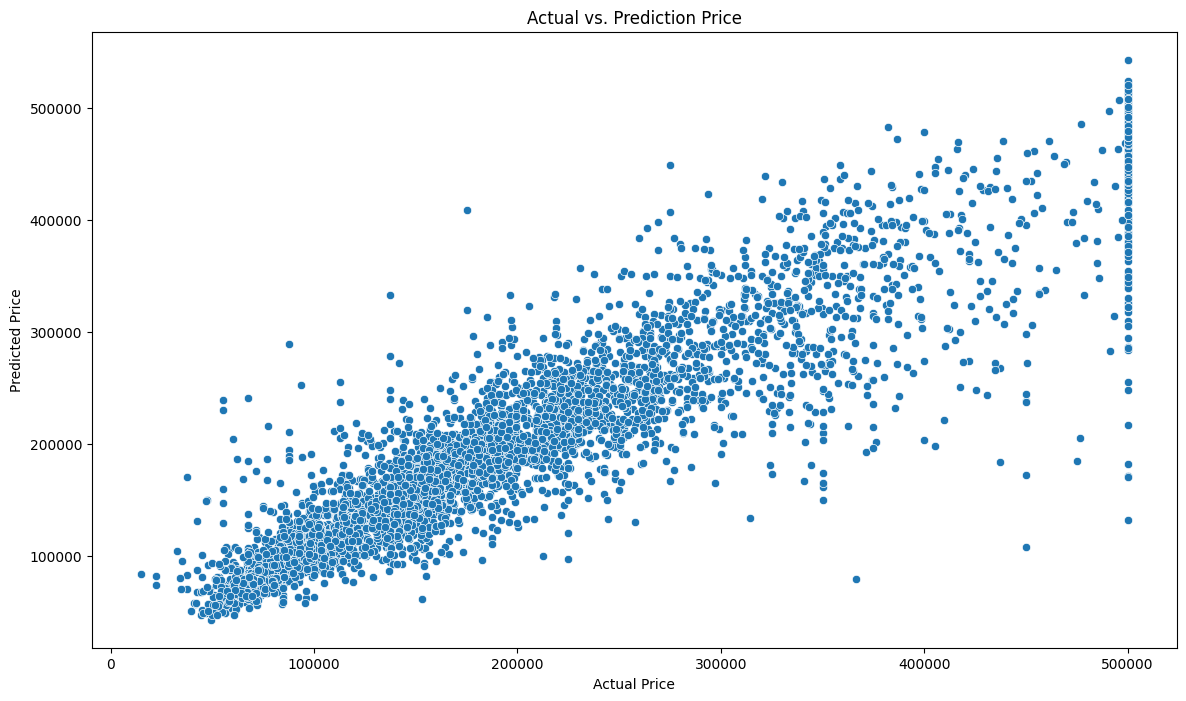

In [28]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price',
                                               xlabel='Actual Price',
                                               ylabel='Predicted Price');

Berdasarkan https://stephenallwright.com/good-mape-score/

MAPE dengan nilai 10% - 20% termasuk model yang bagus.

Kita bisa lihat dalam plot tersebut bahwa hanya beberapa yang termasuk error, dan kebanyakan berada di garis tengah yang berarti harga aktual dan harga yang diprediksi sama / tidak beda jauh.

**Feature Importances**


Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (median_house_value), kita dapat mengeceknya melalui function feature_importances_.

<Axes: >

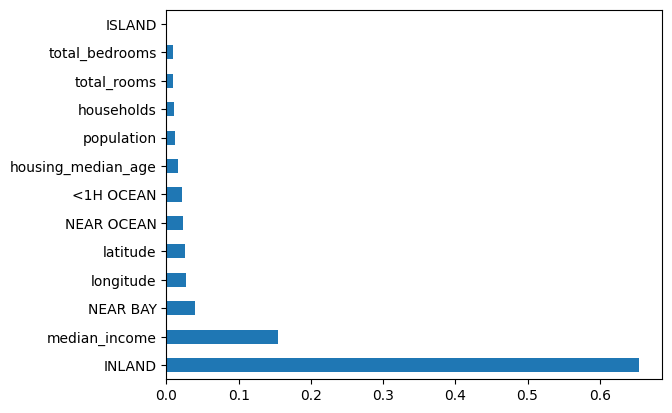

In [29]:
feat_importances = pd.Series(xgb_tuning['model'].feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

# Conclusion

Berdasarkan pemodelan yang sudah dilakukan, fitur 'ocean_proximity' yang INLAND dan 'median_income' menjadi fitur yang paling berpengaruh terhadap 'median_house_value'.

Namun, disini INLAND berarti lebih murah daripada perumahan yang berada di NEAR OCEAN dan lain lain

Sebab kenapa INLAND bisa menjadi pengaruh yang paling besar adalah karena jumlah data yang memiliki data INLAND adalah yang paling banyak. Maka Model menganggap bahwa INLAND mempunyai importance yang paling tinggi.

 Metrik evaluasi yang digunakan pada model adalah nilai RMSE, MAE & MAPE. Jika ditinjau dari nilai MAPE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning, yaitu sebesar ~17%, kita dapat menyimpulkan bahwa bila nanti model yang kita buat ini digunakan untuk memperkirakan harga perumahan di California pada rentang nilai seperti yang dilatih terhadap model, maka perkiraan harganya rata-rata akan meleset kurang lebih sebesar 17% dari harga seharusnya.

 Tetapi, tidak menutup kemungkinan juga prediksinya meleset lebih jauh karena bias yang dihasilkan model masih cukup tinggi bila dilihat dari visualisasi antara harga aktual dan prediksi. Bias yang dihasilkan oleh model ini dikarenakan oleh terbatasnya fitur pada dataset yang bisa merepresentasikan aspek properti dan juga services, seperti jumlah kamar, luas bangunan, strategic spots dan lain lain.


# Recommendation

Dalam dataset kali ini, hal yang bisa kita lakukan untuk meningkatkan akurasi model adalah memperbanyak data yang akan dianalisa.

Untuk Akurasi Model, Model ini sudah termasuk bagus karena hanya memiliki error sekitar 17%.

Bisa juga untuk menambahkan features-features yang lebih koleratif terhadap housing_median_values.

Rekom
1. Kembangkan model terpisah untuk berbagai wilayah di dalam California untuk menangkap dinamika pasar yang unik dan meningkatkan akurasi prediksi.

2. Pastikan data berkualitas tinggi (fitur yang lebih koleratif terhadap median_house_value)  untuk pelatihan dan secara rutin perbarui model untuk mencerminkan perubahan kondisi pasar.

3. Terapkan teknik untuk menjelaskan bagaimana model membuat prediksi, membangun kepercayaan dengan para pemangku kepentingan.




#Save Model

In [31]:
# import pickle
# filename = '/content/drive/MyDrive/CHPModel.sav'
# pickle.dump(xgb_tuning['model'], open(filename, "wb"))